In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def fitness_function(initial, TestFunctionNo):
    x = initial
    
    if TestFunctionNo == 1:
        o = 10 * -np.cos(2 * np.sqrt(x[0]**2 + x[1]**2)) * np.exp(-0.5 * np.sqrt((x[0] + 1)**2 + (x[1] - 1)**2)) + 5.1
    elif TestFunctionNo == 2:
        o = -peaks(x[0], x[1]) + 8.5
    elif TestFunctionNo == 3:
        o = -1 * (0.2 + x[0]**2 + x[1]**2 - 0.1 * np.cos(6 * np.pi * x[0]) - 0.1 * np.cos(6 * np.pi * x[1]))
    elif TestFunctionNo == 4:
        o = -1 * np.sum(np.square(x))
    
    return o

def peaks(x, y):
    # This is a placeholder for the MATLAB peaks function.
    # You need to implement the actual peaks function logic here.
    return 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) - 1/3*np.exp(-(x+1)**2 - y**2)

In [3]:
TestFunctionNo = 3

initial = [0.8, -0.5]

cost_initial = fitness_function(initial, TestFunctionNo)

ub = [1, 1]
lb = [-1, -1]

stepsize = [0.05, 0.05]

nVar = len(initial)

optimum_found = False

A = {
    'position':initial,
    'cost':cost_initial
}

In [4]:
def getneighbours(A, stepsize, ub, lb, TestFunctionNo):
    nVar = len(A['position'])

    neighbours = []
    
    for idx in range(1, 5):
        if idx == 1:
            step_vector = [stepsize[0], 0]
        elif idx == 2:
            step_vector = [0, stepsize[1]]
        elif idx == 3:
            step_vector = [-stepsize[0], 0]
        elif idx == 4:
            step_vector = [0, -stepsize[1]]

    neighbour = {
            'position': [A['position'][i] + step_vector[i] for i in range(nVar)]
        }
    
    for i in range(nVar):
            if neighbour['position'][i] > ub[i]:
                neighbour['position'][i] = ub[i]
            if neighbour['position'][i] < lb[i]:
                neighbour['position'][i] = lb[i]
        
        # Calculate the cost
    neighbour['cost'] = fitness_function(neighbour['position'], TestFunctionNo)
        
    neighbours.append(neighbour)
    
    return neighbours

In [5]:
trajectory = []

iter = 0

while not optimum_found:
    neighbours = getneighbours(A, stepsize, ub, lb, TestFunctionNo)

    iter += 1
    trajectory.append({
        'position': A['position'],
        'cost': A['cost']
    })

    improvement = False
    for k in range(len(neighbours)):
        B = neighbours[k]

        if B['cost'] > A['cost']:
            A['position'] = B['position']
            A['cost'] = B['cost']
            improvement = True

        if not improvement:
            optimum_found = True

trajectory

[{'position': [0.8, -0.5], 'cost': np.float64(-1.2709016994374949)}]

In [6]:
if len(trajectory) == 0:
    raise ValueError("Trajectory is empty. Ensure the optimization loop is working correctly.")

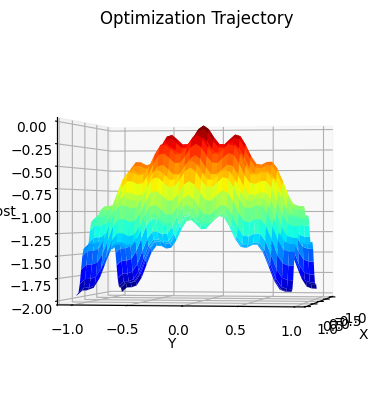

<Figure size 640x480 with 0 Axes>

In [7]:

# Plotting the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Surface plot
x = np.arange(lb[0], ub[0], stepsize[0])
y = np.arange(lb[1], ub[1], stepsize[1])
x_new, y_new = np.meshgrid(x, y)

z_new = np.zeros_like(x_new)
for i in range(len(x)):
    for j in range(len(y)):
        X = [x_new[i, j], y_new[i, j]]
        z_new[i, j] = fitness_function(X, TestFunctionNo)

ax.plot_surface(x_new, y_new, z_new, cmap='jet', alpha=1)

# Trajectory plot
traj_final_x = [t['position'][0] for t in trajectory]
traj_final_y = [t['position'][1] for t in trajectory]
traj_final_z = [t['cost'] for t in trajectory]

ax.plot(traj_final_x, traj_final_y, traj_final_z, '-.k', linewidth=1)
ax.plot([traj_final_x[0]], [traj_final_y[0]], [traj_final_z[0]], '*r')
ax.plot([traj_final_x[-1]], [traj_final_y[-1]], [traj_final_z[-1]], '*g')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Cost')
ax.set_title('Optimization Trajectory')

# Viewing from different angles
angles = [10]
for angle in angles:
    ax.view_init(0, angle)
    plt.draw()
    plt.pause(0.5)

plt.savefig('plot.')

plt.show()

Best solution obtained by HC:
{'position': [0.8, -0.5], 'cost': np.float64(-1.2709016994374949)}


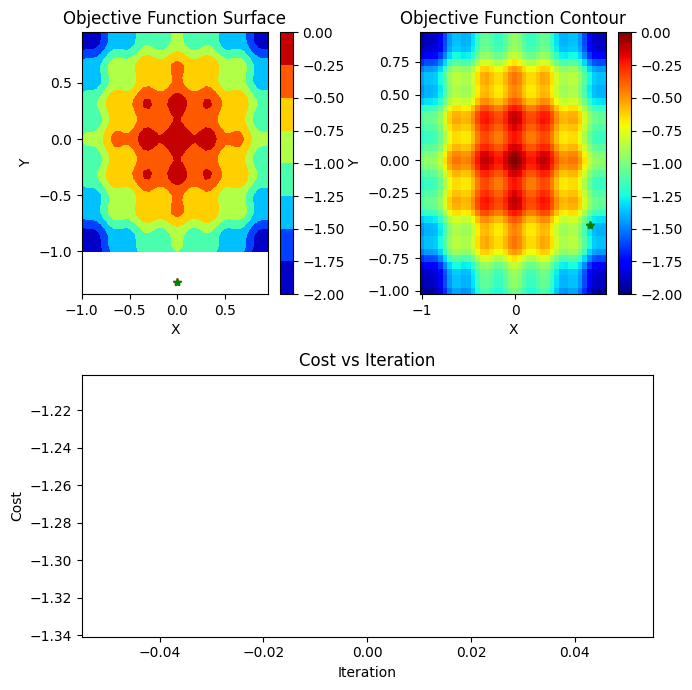

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Display the best solution
print('Best solution obtained by HC:')
print(A)

# Create a figure
plt.figure(figsize=(7, 7))

# Subplot 1
plt.subplot(2, 2, 1)
x = np.arange(lb[0], ub[0], stepsize[0])
y = np.arange(lb[1], ub[1], stepsize[1])
x_new, y_new = np.meshgrid(x, y)

z_new = np.zeros_like(x_new)
for i in range(len(x)):
    for j in range(len(y)):
        X = [x_new[i, j], y_new[i, j]]
        z_new[i, j] = fitness_function(X, TestFunctionNo)

plt.contourf(x_new, y_new, z_new, cmap='jet')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Objective Function Surface')


traj_final_x = [trajectory[k]['position'][0] for k in range(len(trajectory))]
traj_final_y = [trajectory[k]['position'][1] for k in range(len(trajectory))]
traj_final_z = [trajectory[k]['cost'] for k in range(len(trajectory))]

plt.plot(traj_final_x, traj_final_y, traj_final_z, '-.k', linewidth=1)
plt.plot(traj_final_x[0], traj_final_y[0], traj_final_z[0], '*r')
plt.plot(traj_final_x[-1], traj_final_y[-1], traj_final_z[-1], '*g')

# Subplot 2
plt.subplot(2, 2, 2)
plt.pcolor(x_new, y_new, z_new, cmap='jet', shading='auto')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Objective Function Contour')


plt.plot(traj_final_x, traj_final_y, '-.k', linewidth=1)
plt.plot(traj_final_x[0], traj_final_y[0], '*r')
plt.plot(traj_final_x[-1], traj_final_y[-1], '*g')

# Subplot 3
plt.subplot(2, 2, (3, 4))
plt.plot([t['cost'] for t in trajectory])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')

plt.tight_layout()
plt.show()
